**Nota:** Los siguientes ejercicios están basados en las notas de clase disponibles en: https://github.com/ITAM-DS/Propedeutico/tree/master/R/clases/2_probabilidad.

**Los siguientes ejercicios realizarlos en R y con ggplot2**

In [13]:
options(repr.plot.width=4, repr.plot.height=4) #esta línea sólo se ejecuta para jupyterlab con R

In [ ]:
install.packages('prob')

In [15]:
library(prob)
library(ggplot2)

# Ejercicio 5:
Encontrar los histogramas de probabilidad para las distribuciones asociadas a las siguientes variables aleatorias:<br>
- a. El número de águilas que aparecen cuando lanzamos tres monedas al aire.

In [172]:
S_5a <- tosscoin(3, makespace = TRUE)
S_5a 

toss1,toss2,toss3,probs
<fct>,<fct>,<fct>,<dbl>
H,H,H,0.125
T,H,H,0.125
H,T,H,0.125
T,T,H,0.125
H,H,T,0.125
T,H,T,0.125
H,T,T,0.125
T,T,T,0.125


In [173]:
T_uno <- isin(S_5a, c("H", "T", "T"), ordered = FALSE)
T_uno                

[1] FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE

In [174]:
# Vamos a suponer que aguila = H, sol = T
agui_0 <- isin(S_5a, c("T", "T", "T"), ordered = FALSE)
agui_1 <- isin(S_5a, c("H", "T", "T"), ordered = FALSE)
agui_2 <- isin(S_5a, c("H", "H", "T"), ordered = FALSE)
agui_3 <- isin(S_5a, c("H", "H", "H"), ordered = FALSE)

# Subsets y probabilidades
X_A0 <- subset(S_5a, agui_0); Pr_X_A0 <- sum(X_A0$probs)
X_A1 <- subset(S_5a, agui_1); Pr_X_A1 <- sum(X_A1$probs)
X_A2 <- subset(S_5a, agui_2); Pr_X_A2 <- sum(X_A2$probs)
X_A3 <- subset(S_5a, agui_3); Pr_X_A3 <- sum(X_A3$probs)

In [232]:
# Crear dataframe con las distribuciones de probabilidad
probs_marg_agui = c(Pr_X_A0, Pr_X_A1, Pr_X_A2, Pr_X_A3)
df_aguila = data.frame(nro_aguilas = c("cero", "uno", "dos", "tres"),
                      X_agui = c(0, 1, 2, 3), 
                       probs_marg_agui)
df_aguila

nro_aguilas,X_agui,probs_marg_agui
<fct>,<dbl>,<dbl>
cero,0,0.125
uno,1,0.375
dos,2,0.375
tres,3,0.125


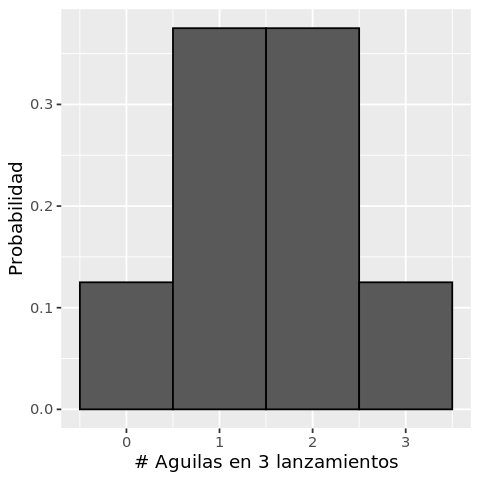

In [233]:
#install.packages("ggplot2")
library(ggplot2)
# qplot(X, geom="histogram")
ggplot(data = df_aguila, aes(x=X_agui, y=probs_marg_agui)) +
geom_col(width=1, colour='black') +
labs(title = NULL, x = '# Aguilas en 3 lanzamientos', y = 'Probabilidad')

- b. La suma de los números de las caras cuando se lanzan dos dados.

In [185]:
S_5b <- rolldie(2, makespace = TRUE)
head(S_5b)

X1,X2,probs
<int>,<int>,<dbl>
1,1,0.02777778
2,1,0.02777778
3,1,0.02777778
4,1,0.02777778
5,1,0.02777778
6,1,0.02777778


In [188]:
S_5b <- addrv(S_5b, FUN=sum, invar= c('X1', 'X2'), name= 'sum_caras')
tail(S_5b)

,X1,X2,caras,sum_caras,sum_caras,probs
,<int>,<int>,<int>,<int>,<int>,<dbl>
31,1,6,7,7,7,0.02777778
32,2,6,8,8,8,0.02777778
33,3,6,9,9,9,0.02777778
34,4,6,10,10,10,0.02777778
35,5,6,11,11,11,0.02777778
36,6,6,12,12,12,0.02777778


In [261]:
probs_marg_caras = marginal(S_5b, vars = "sum_caras")
probs_marg_caras

sum_caras,probs
<int>,<dbl>
2,0.02777778
3,0.05555556
4,0.08333333
5,0.11111111
6,0.13888889
7,0.16666667
8,0.13888889
9,0.11111111
10,0.08333333


In [262]:
# Crear dataframe con las distribuciones de probabilidad
probs_marg_caras <- probs_marg_caras$probs
caras <- c( '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12')
df_caras <- data.frame(caras, 
                      X_caras = c(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), 
                       probs_marg_caras)
df_caras

caras,X_caras,probs_marg_caras
<fct>,<dbl>,<dbl>
2,2,0.02777778
3,3,0.05555556
4,4,0.08333333
5,5,0.11111111
6,6,0.13888889
7,7,0.16666667
8,8,0.13888889
9,9,0.11111111
10,10,0.08333333


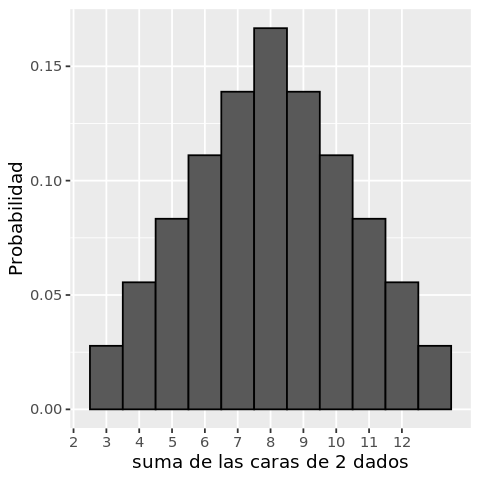

In [278]:
ggplot(data = df_caras, aes(x=X_caras, y=probs_marg_caras), fill=caras) +
geom_col(width=1, colour='black') +
labs(title = NULL, x = 'suma de las caras de 2 dados', y = 'Probabilidad') +
scale_x_discrete(limits=caras)

---

# Ejercicio 6: 
Se venden 8000 boletos para una rifa de $\$5000.00$ y cada boleto cuesta $\$2.00$.

... a. Encontrar la ganancia esperada del comprador de un boleto.

Suponga que $G$ y $P$ son los eventos de ganar y perder la lotería, respectivamente. Por otro lado, la ganancia, $X$, se define como el premio recibido por el jugador y la resta del respectivo premio,  $ganancia=premio-2$. Dado lo anterior:<br><br>
$$
\begin{array}{ccccccc}
f\left(4998\right) & = & P\left(X=4998\right) & = & P\left(\left\{ ganar\right\} \right) & = & \frac{1}{8000}\\
f\left(-2\right) & = & P\left(X=-2\right) & = & P\left(\left\{ perder\right\} \right) & = & \frac{7999}{8000}
\end{array}
$$
<br>
Entonces, el valor esperado de $X$:
$$
\begin{array}{ccc}
E\left(X\right)) & = & \frac{1}{8000}\left(4998\right)+\frac{7999}{8000}\left(-2\right)\\
 & = & 0.62475-1.99975\\
 & = & -1.375
\end{array}
$$
<br><br>
**En R:**

In [286]:
# Se crea una dataframe con las probabilidades y las ganancias asociadas
df_rifa = data.frame(evento = c('Gana', 'Pierde'), X = c(4998, -2), p_rifa = c(1/8000, 7999/8000))
ve_gan = sum(df_rifa$X *df_rifa$p_rifa)
print(paste('El valor esperado de la ganancia es: $',ve_gan ))

[1] "El valor esperado de la ganancia es: $ -1.375"


... b. Hacer la gráfica de la ganancia esperada que tiene una compradora en términos de un número de boletos $n$.

In [334]:
n_boletos = seq(0, 3000, 100); n_boletos[1] = 1
n_prob_gan = 1/n_boletos; n_prob_pie = 1-n_prob_gan
premio = 5000; costo = 2
pago_gana = premio - costo
pago_pierde = - costo
E_ganancia_jug = (n_prob_gan*pago_gana) + (n_prob_pie*pago_pierde)
E_ganancia_org = (costo*n_boletos) - premio


In [335]:
df_rifa_b = data.frame(n_boletos, E_ganancia_jug, E_ganancia_org)
head(df_rifa_b)

n_boletos,E_ganancia_jug,E_ganancia_org
<dbl>,<dbl>,<dbl>
1,4998.00000,-4998
100,48.00000,-4800
200,23.00000,-4600
300,14.66667,-4400
400,10.50000,-4200
500,8.00000,-4000


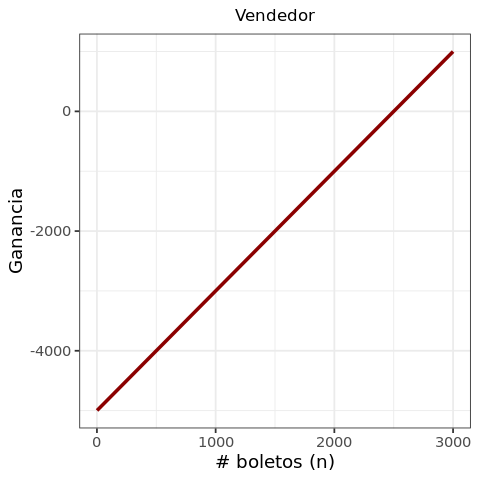

In [359]:
ggplot(data= df_rifa_b) + 
geom_line(mapping = aes(x = n_boletos, y = E_ganancia_org), colour='red4', size=1) +
labs(title = 'Vendedor', x = '# boletos (n)', y = 'Ganancia') +
theme_bw() +
theme(plot.title = element_text(size=10, hjust = 0.5)) 

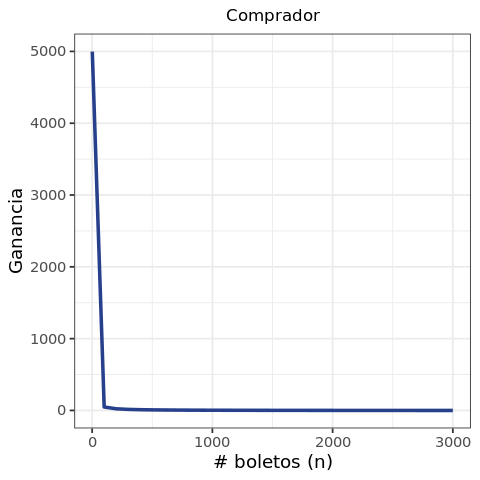

In [358]:
ggplot(data= df_rifa_b) + 
geom_line(mapping = aes(x = n_boletos, y = E_ganancia_jug), colour='royalblue4', size=1) +
labs(title = 'Comprador', x = '# boletos (n)', y = 'Ganancia') +
theme_bw() +
theme(plot.title = element_text(size=10, hjust = 0.5))

**Otro:** Para un premio de 5000, ¿cuál es el número minimo de boletos que debe vender la organizadora para tener un beneficio nulo?

In [371]:
pos_ganancia_nul_org =which(E_ganancia_org==0)
n_boletos_gan_nula_org = n_boletos[pos_ganancia_nul_org]
print(paste('El nro. minimo de boletos que la organizadora de la rifa debe vender para tener un beneficio de 0, es:',
           n_boletos_gan_nula_org))

[1] "El nro. minimo de boletos que la organizadora de la rifa debe vender para tener un beneficio de 0, es: 2500"


... c. ¿Cuál debería de ser el premio mínimo para que se pudiese garantizar “salir a mano” al comprar todos los boletos.

Las ganancias de quien compre todos los boletos de la rifa se definen como $ganancia=premio-boleto(n)$, donde $boleto$ es el costo de cada boleto de la rifa. De la anterior ecuación se evalúa el número mínimo de boletos necesarios tales que $0=premio_{min}-boleto(n)$:<br><br>
$$
premio_{min}=boleto(n)
$$
<br>
Para un costo de boleto de 2, como en este ejemplo, se tiene $premio_{min}=2n$.
<br><br>
**En R:**

In [382]:
premio_min = costo*n_boletos
df_rifa_c = data.frame(n_boletos,premio_min)

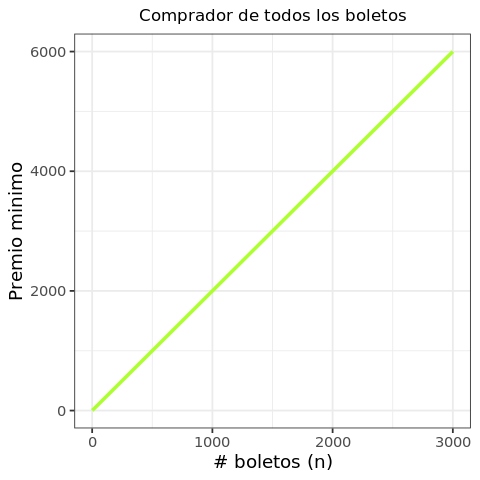

In [381]:
ggplot(data= df_rifa_c) + 
geom_line(mapping = aes(x = n_boletos, y = premio_min), colour='greenyellow', size=1) +
labs(title = 'Comprador de todos los boletos', x = '# boletos (n)', y = 'Premio minimo') +
theme_bw() +
theme(plot.title = element_text(size=10, hjust = 0.5))

---